In [720]:
import requests
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns

%matplotlib inline

In [923]:
# total_confirmed = requests.get('https://covid.ourworldindata.org/data/total_cases.csv')
# total_deaths = requests.get('https://covid.ourworldindata.org/data/total_deaths.csv')
# new_confirmed = requests.get('https://covid.ourworldindata.org/data/new_cases.csv')
# new_deaths = requests.get('https://covid.ourworldindata.org/data/new_deaths.csv')
full_dataset = requests.get('https://covid.ourworldindata.org/data/full_data.csv')

In [924]:
# with open('./total_confirmed.csv', 'wb') as f:
#     f.write(total_confirmed.content)
    
# with open('./total_deaths.csv', 'wb') as f:
#     f.write(total_deaths.content)
    
# with open('./new_confirmed.csv', 'wb') as f:
#     f.write(new_confirmed.content)
    
# with open('./new_deaths.csv', 'wb') as f:
#     f.write(new_deaths.content)
    
with open('./full_dataset.csv', 'wb') as f:
    f.write(full_dataset.content)

In [925]:
full_dataset = pd.read_csv('full_dataset.csv', parse_dates=['date'])
full_dataset.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,NaN,NaN,1,NaN
1,2020-02-26,Afghanistan,0.0,NaN,1,NaN
2,2020-02-27,Afghanistan,0.0,NaN,1,NaN
3,2020-02-28,Afghanistan,0.0,NaN,1,NaN
4,2020-02-29,Afghanistan,0.0,NaN,1,NaN


In [926]:
full_dataset = full_dataset.fillna(0)
full_dataset.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,0.0,0.0,1,0.0
1,2020-02-26,Afghanistan,0.0,0.0,1,0.0
2,2020-02-27,Afghanistan,0.0,0.0,1,0.0
3,2020-02-28,Afghanistan,0.0,0.0,1,0.0
4,2020-02-29,Afghanistan,0.0,0.0,1,0.0


In [927]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2867 entries, 0 to 2866
Data columns (total 6 columns):
date            2867 non-null datetime64[ns]
location        2867 non-null object
new_cases       2867 non-null float64
new_deaths      2867 non-null float64
total_cases     2867 non-null int64
total_deaths    2867 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 134.5+ KB


In [928]:
full_dataset = full_dataset.sort_values(['date', 'total_cases'])

In [929]:
full_dataset[full_dataset.total_cases == full_dataset.total_cases.max()]

,date,location,new_cases,new_deaths,total_cases,total_deaths
2866,2020-03-17,World,11594.0,819.0,179112,7426.0


In [840]:
world_dataset = full_dataset[full_dataset.location == 'World']
full_dataset = full_dataset[full_dataset.location != 'World']

In [841]:
full_dataset[full_dataset.total_cases == full_dataset.total_cases.max()]

,date,location,new_cases,new_deaths,total_cases,total_deaths
554,2020-03-17,China,39.0,13.0,81116,3231.0


## Worldwide Corona cases 

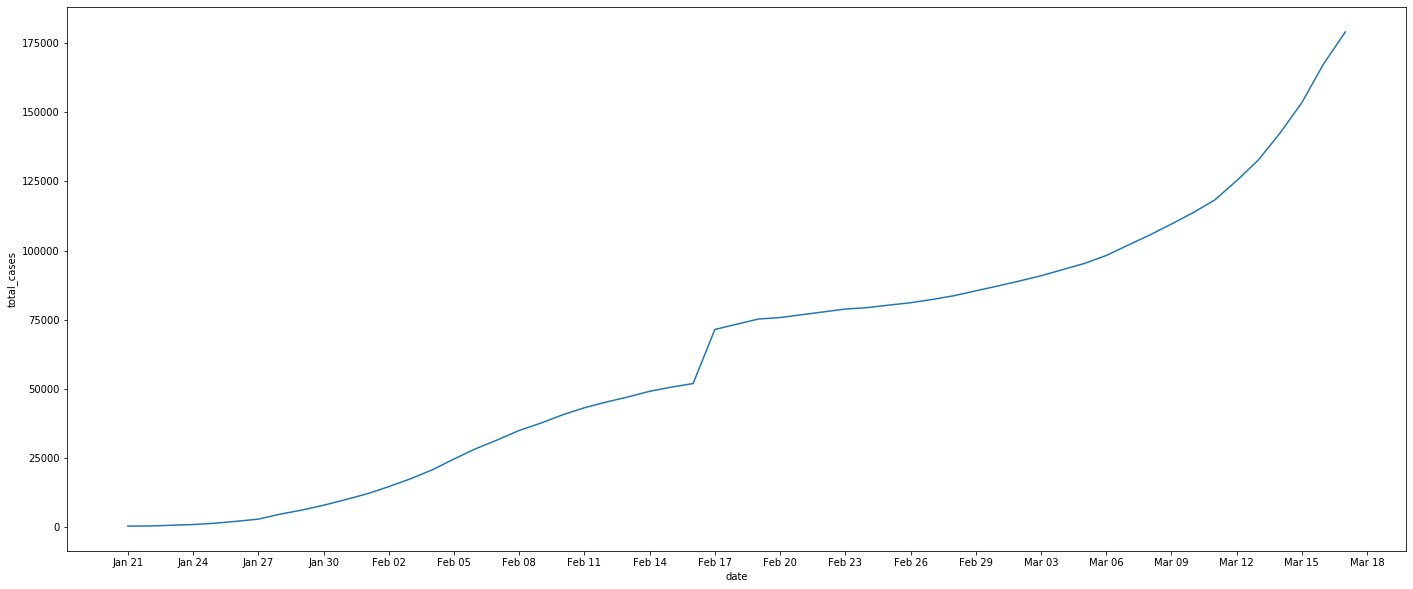

In [842]:
plt.figure(figsize = (24, 10))

ax = sns.lineplot(x="date", y="total_cases", markers=True, data=world_dataset)
ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))


In [843]:
no_china_dataset = full_dataset[full_dataset.location != 'China']

In [844]:
highest_countries = no_china_dataset.nlargest(4, ['date', 'total_cases']).reset_index()
highest_countries

,index,date,location,new_cases,new_deaths,total_cases,total_deaths
0,1310,2020-03-17,Italy,3233.0,694.0,27980,2503.0
1,1199,2020-03-17,Iran,0.0,0.0,14991,853.0
2,2365,2020-03-17,Spain,1438.0,21.0,9191,309.0
3,2050,2020-03-17,South Korea,84.0,6.0,8320,81.0


## Cases of Corona virus excluding China

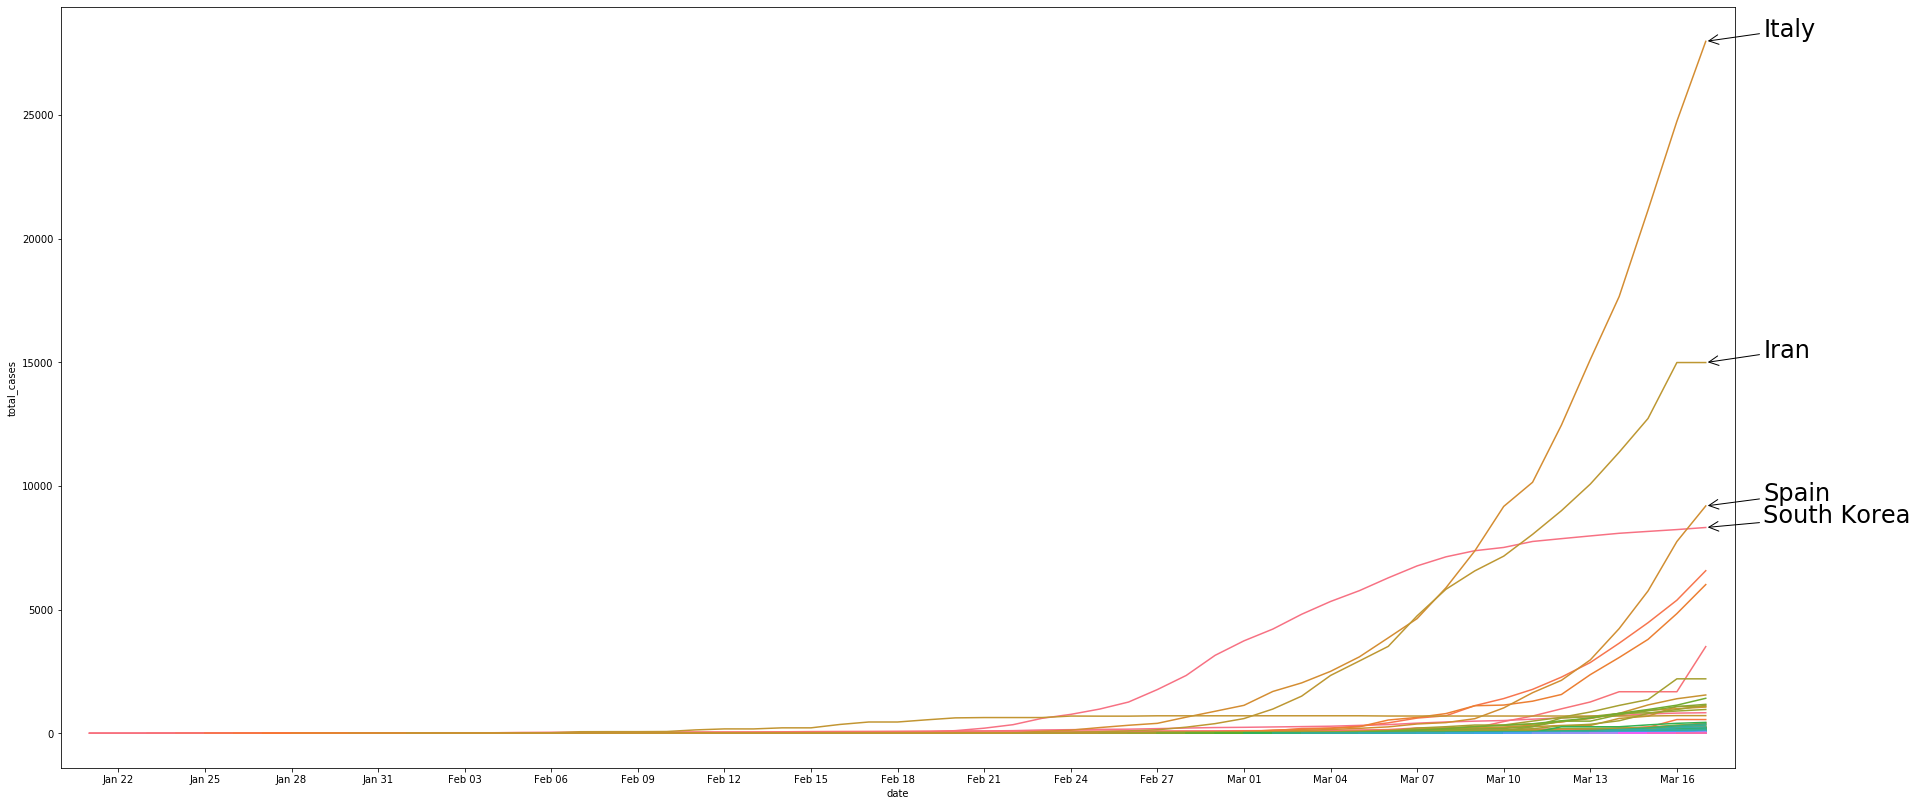

In [845]:

plt.figure(figsize = (30, 14))

ax = sns.lineplot(x="date", y="total_cases", hue="location", legend=False,  data=no_china_dataset)

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

ax.set_xlim([no_china_dataset.date.min() - datetime.timedelta(days=1), no_china_dataset.date.max() + datetime.timedelta(days=1)])

for i in range(4):
    ax.annotate(highest_countries.iloc[i].location, 
                xy=(no_china_dataset.date.max(), highest_countries.iloc[i].total_cases), fontsize=24,
                xytext=(no_china_dataset.date.max() + datetime.timedelta(days=2),
                        highest_countries.iloc[i].total_cases + 200), 
                arrowprops=dict(facecolor='black', arrowstyle="->"));



## Same as above  but no arrows 

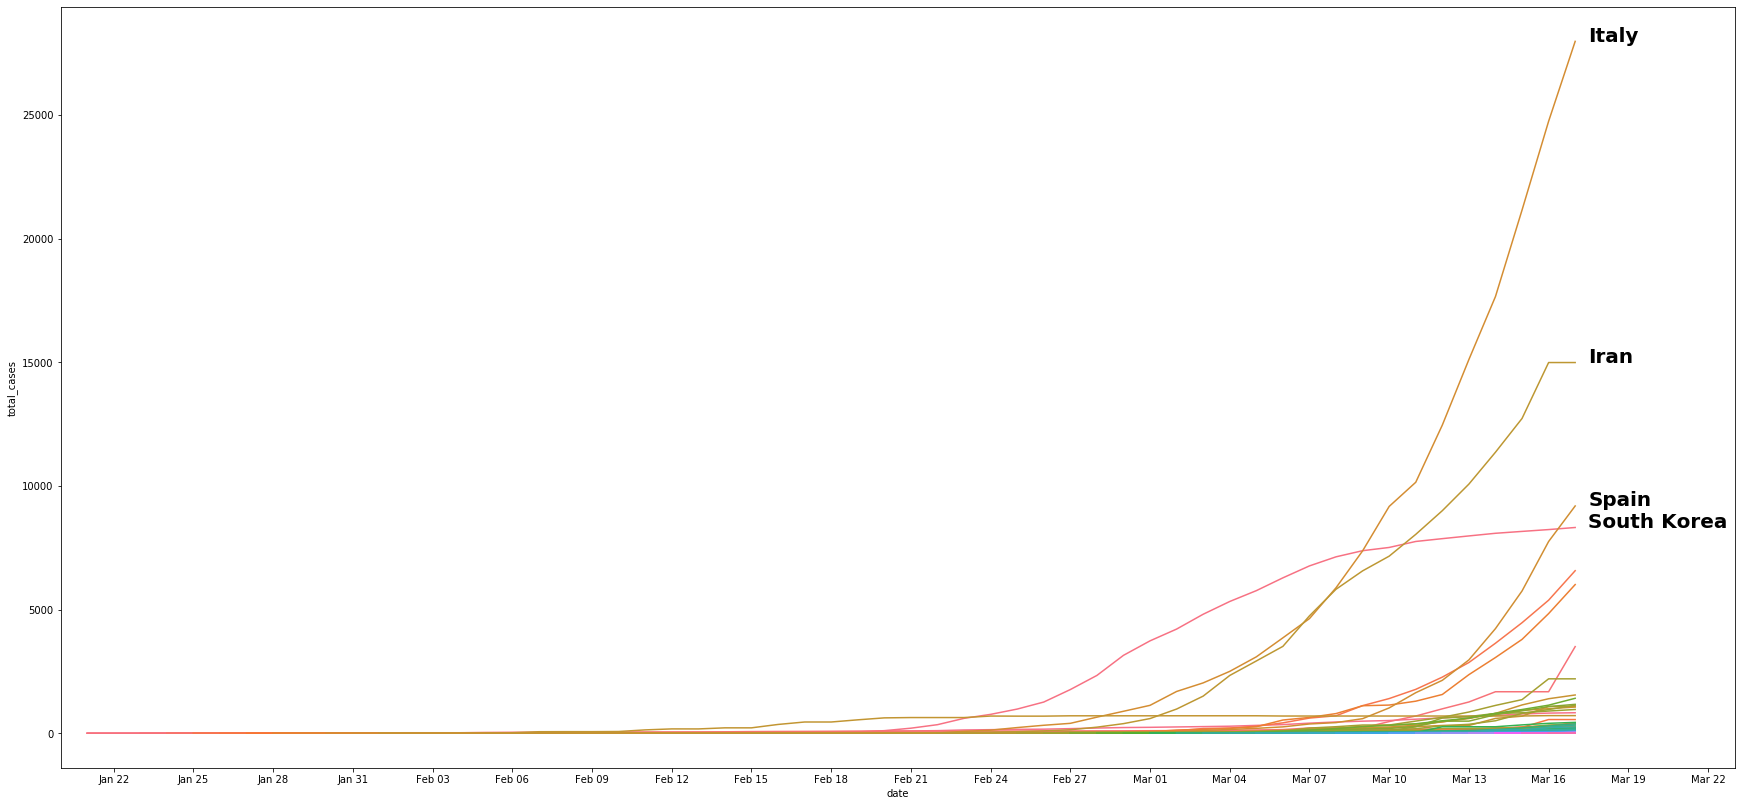

In [846]:
plt.figure(figsize = (30, 14))


ax = sns.lineplot(x="date", y="total_cases", hue="location", legend=False,  data=no_china_dataset)

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

ax.set_xlim([no_china_dataset.date.min() - datetime.timedelta(days=1), no_china_dataset.date.max() + datetime.timedelta(days=6)])


for line in range(0,highest_countries.shape[0]):
     ax.text(highest_countries.date[line] + datetime.timedelta(days=0.5), highest_countries.total_cases[line], highest_countries.location[line], horizontalalignment='left', size='20', color='black', weight='bold')
        


In [847]:
highest_countries_last_week

,index,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2039,2020-03-06,South Korea,518.0,7.0,6284,42.0
1,1299,2020-03-06,Italy,769.0,41.0,3858,148.0
2,1188,2020-03-06,Iran,591.0,15.0,3513,107.0
3,1161,2020-03-06,International,-10.0,0.0,696,6.0


## Cases of Corona virus excluding China last week

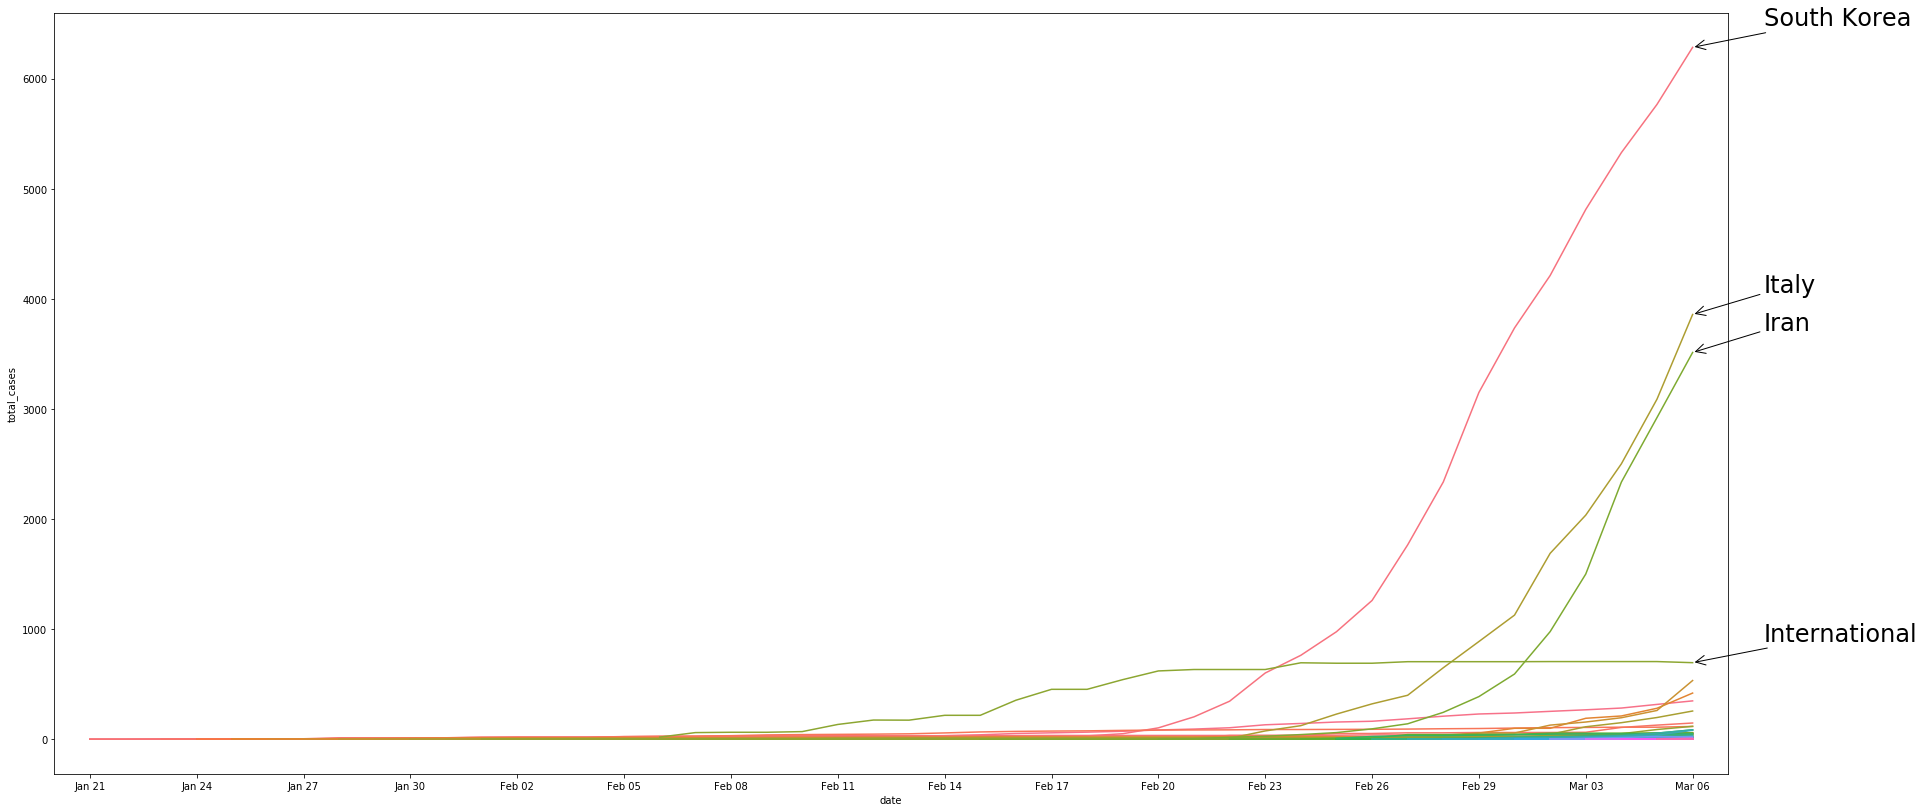

In [848]:
plt.figure(figsize = (30, 14))

one_week_ago = no_china_dataset[no_china_dataset.date < '2020-03-7']
highest_countries_last_week = one_week_ago.nlargest(4, ['date', 'total_cases']).reset_index()
highest_countries_last_week

ax = sns.lineplot(x="date", y="total_cases", hue="location", legend=False,  data=one_week_ago)

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

ax.set_xlim([one_week_ago.date.min() - datetime.timedelta(days=1), one_week_ago.date.max() + datetime.timedelta(days=1)])

for i in range(highest_countries_last_week.shape[0]):
    ax.annotate(highest_countries_last_week.iloc[i].location, 
                xy=(one_week_ago.date.max(), highest_countries_last_week.iloc[i].total_cases), fontsize=24,
                xytext=(one_week_ago.date.max() + datetime.timedelta(days=2),
                        highest_countries_last_week.iloc[i].total_cases + 200), 
                arrowprops=dict(facecolor='black', arrowstyle="->"));

In [849]:
no_outliers = no_china_dataset[~ no_china_dataset.location.isin(highest_countries.location)]
highest_no_outliers = no_outliers.nlargest(10, ['date', 'total_cases']).reset_index()
highest_no_outliers

,index,date,location,new_cases,new_deaths,total_cases,total_deaths
0,870,2020-03-17,France,1193.0,21.0,6573,148.0
1,960,2020-03-17,Germany,1174.0,1.0,6012,13.0
2,2747,2020-03-17,United States,1825.0,17.0,3503,58.0
3,2488,2020-03-17,Switzerland,0.0,1.0,2200,14.0
4,2591,2020-03-17,United Kingdom,152.0,20.0,1547,55.0
5,1734,2020-03-17,Netherlands,278.0,4.0,1413,24.0
6,1812,2020-03-17,Norway,92.0,2.0,1169,3.0
7,175,2020-03-17,Austria,173.0,2.0,1132,3.0
8,285,2020-03-17,Belgium,0.0,0.0,1085,5.0
9,2467,2020-03-17,Sweden,67.0,0.0,1059,3.0


## Excluding outliers, (Italy, Iran, Sk, Spain)

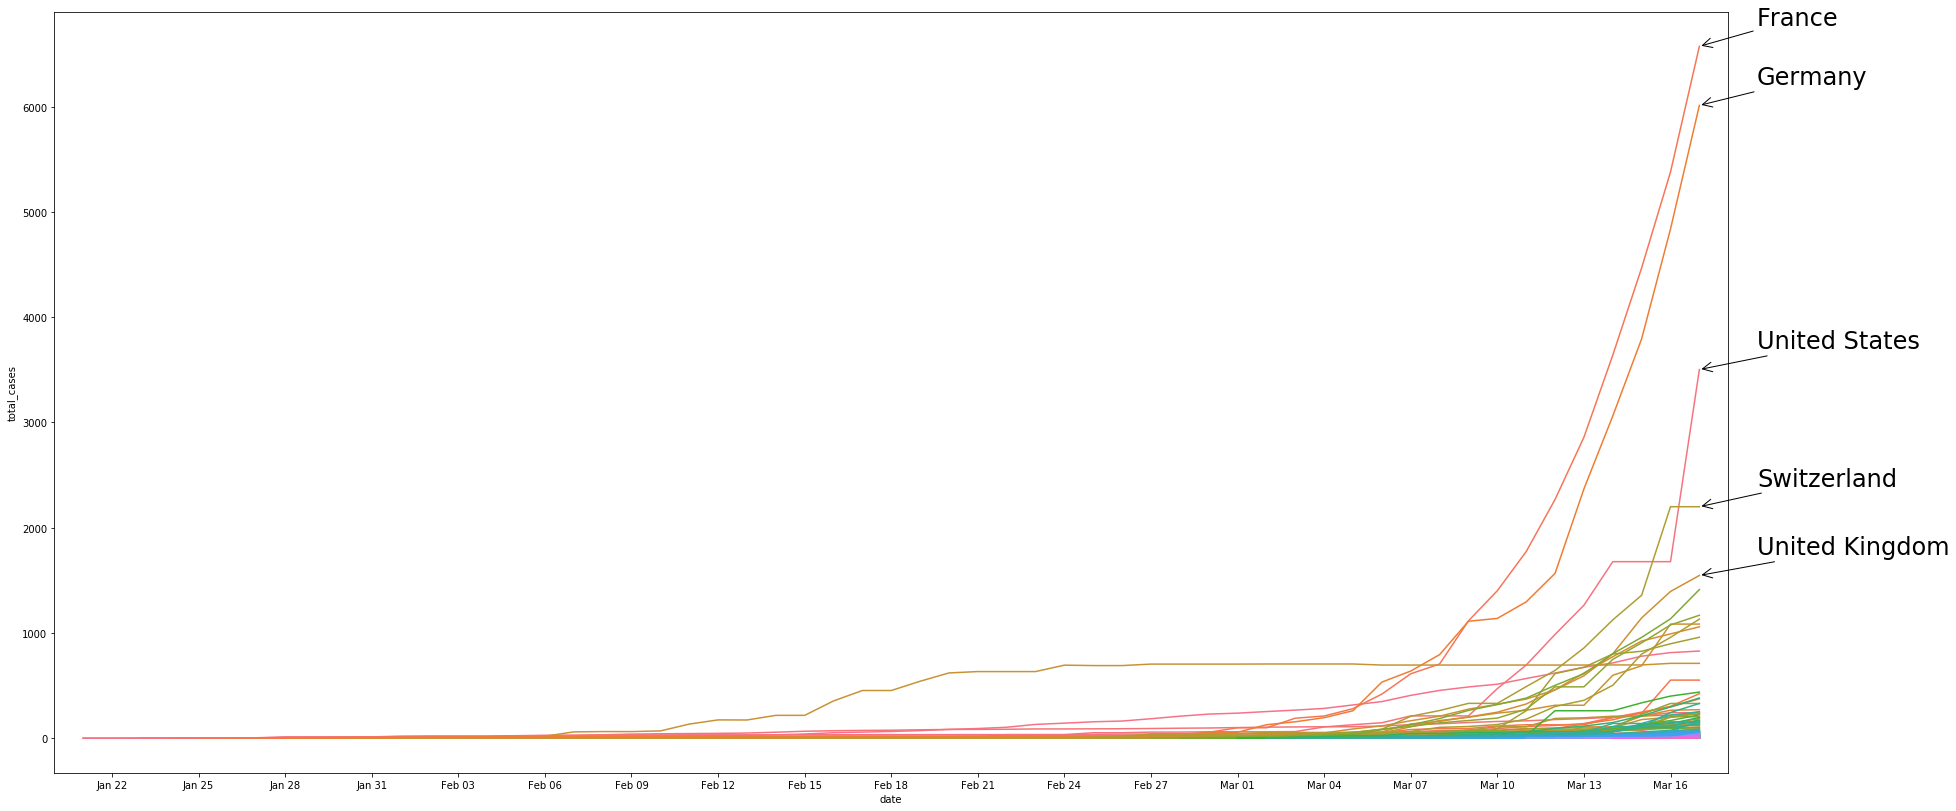

In [850]:
plt.figure(figsize = (30, 14))

ax = sns.lineplot(x="date", y="total_cases", hue="location", legend=False,  data=no_outliers)

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

ax.set_xlim([no_outliers.date.min() - datetime.timedelta(days=1), no_outliers.date.max() + datetime.timedelta(days=1)])

for i in range(5):
    ax.annotate(highest_no_outliers.iloc[i].location, 
                xy=(no_outliers.date.max(), highest_no_outliers.iloc[i].total_cases), fontsize=24,
                xytext=(no_outliers.date.max() + datetime.timedelta(days=2),
                        highest_no_outliers.iloc[i].total_cases + 200), 
                arrowprops=dict(facecolor='black', arrowstyle="->"));



In [851]:
# Saudi + Italy + Iran + SK
# siik = no_china_dataset[no_china_dataset.location.isin(['Italy', 'Iran', 'South Korea', 'Saudi Arabia'])]
gulf_countries = no_china_dataset[no_china_dataset.location.isin(['Saudi Arabia', 'Kuwait', 'Bahrain', 'United Arab Emirates'])]
gulf_highest = gulf_countries.nlargest(4, ['date', 'total_cases']).reset_index()
gulf_highest

,index,date,location,new_cases,new_deaths,total_cases,total_deaths
0,215,2020-03-17,Bahrain,8.0,0.0,229,1.0
1,2199,2020-03-17,Saudi Arabia,30.0,0.0,133,0.0
2,1424,2020-03-17,Kuwait,18.0,0.0,130,0.0
3,2690,2020-03-17,United Arab Emirates,0.0,0.0,98,0.0


## only Saudi

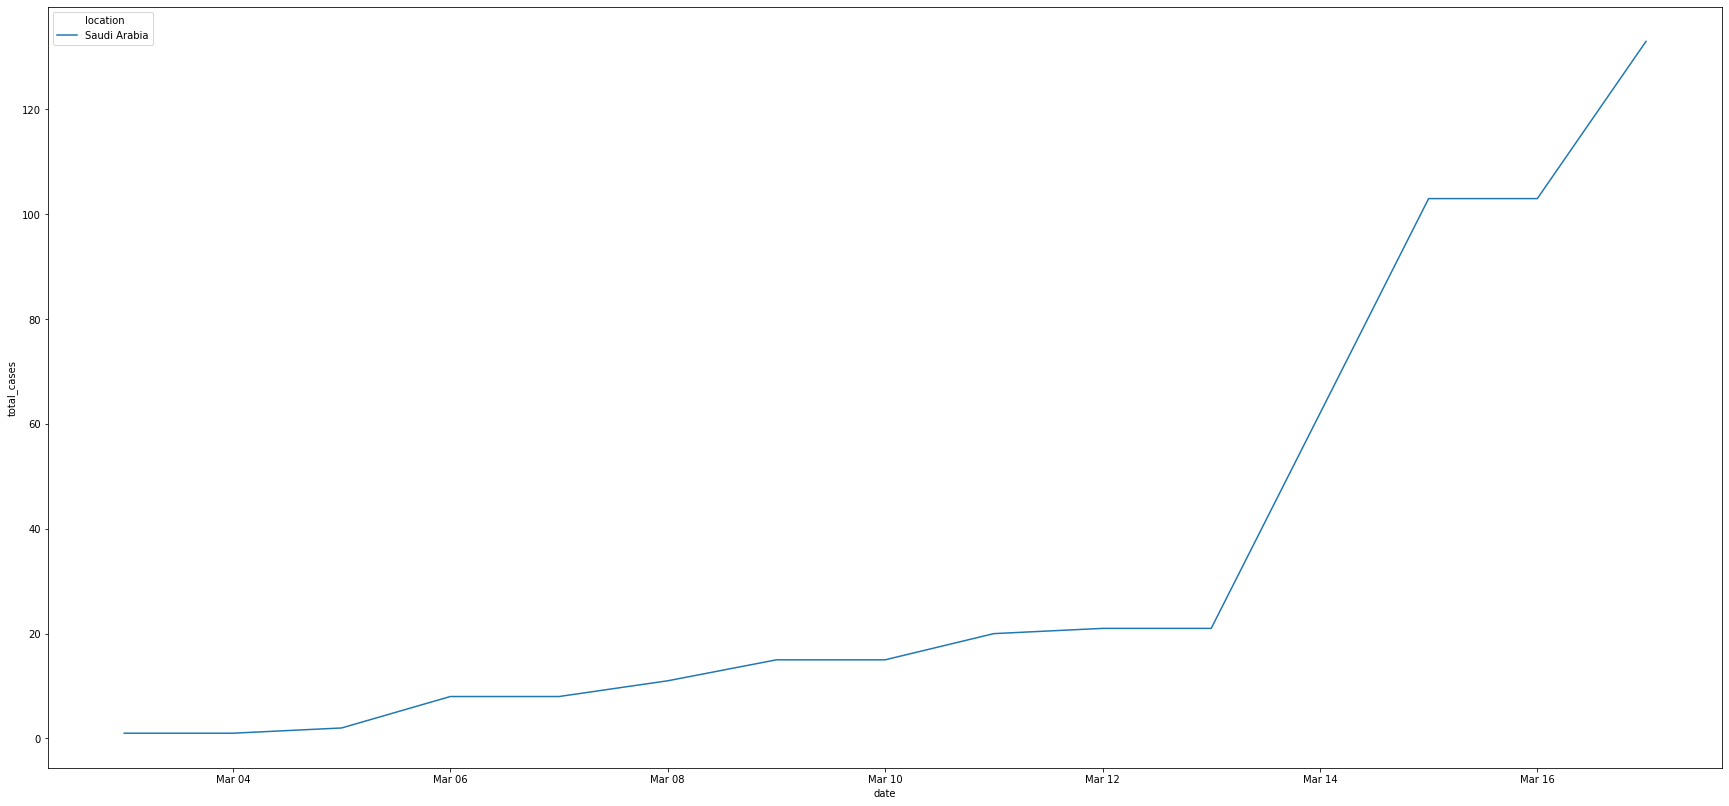

In [852]:
plt.figure(figsize = (30, 14))

ax = sns.lineplot(x="date", y="total_cases", hue="location",  data=gulf_countries[gulf_countries.location == 'Saudi Arabia'])

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

# ax.set_xlim([gulf_countries.date.min() - datetime.timedelta(days=1), gulf_countries.date.max() + datetime.timedelta(days=1)])

## Random Arab Contries

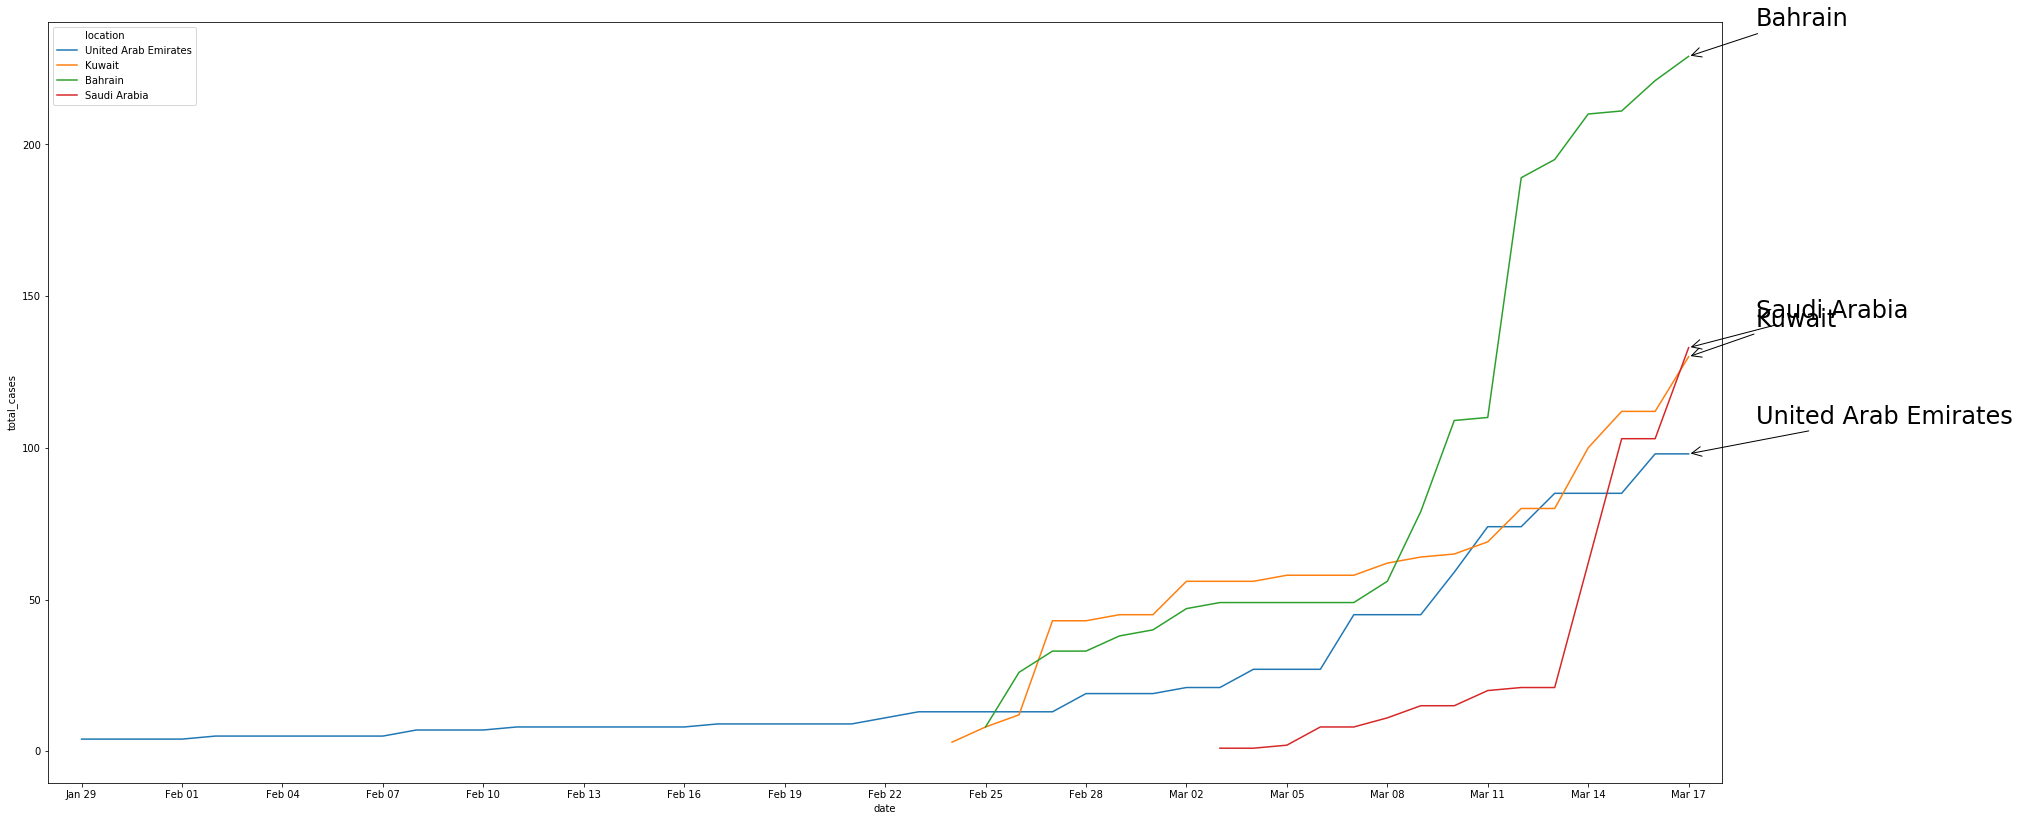

In [853]:
plt.figure(figsize = (30, 14))

ax = sns.lineplot(x="date", y="total_cases", hue="location",  data=gulf_countries)

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

ax.set_xlim([gulf_countries.date.min() - datetime.timedelta(days=1), gulf_countries.date.max() + datetime.timedelta(days=1)])

for i in range(gulf_highest.shape[0]):
    ax.annotate(gulf_highest.iloc[i].location, 
                xy=(gulf_countries.date.max(), gulf_highest.iloc[i].total_cases), fontsize=24,
                xytext=(gulf_countries.date.max() + datetime.timedelta(days=2),
                        gulf_highest.iloc[i].total_cases + 10), 
                arrowprops=dict(facecolor='black', arrowstyle="->"));


## Week period 

In [854]:
def num_of_week(date, location):
    start_date = siik.date[siik.location == location].min()
    week_num = (date - start_date)
    
    return int(week_num / np.timedelta64(1, 'W')) + 1

    

In [855]:
gulf_countries['week'] = gulf_countries.apply(lambda x: num_of_week(x['date'], x['location']), axis=1)
gulf_countries = gulf_countries.sort_values(['date', 'total_cases'])
gulf_highest = gulf_countries.nlargest(4, ['date', 'total_cases']).reset_index()

/Users/mohammedalawami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [856]:
weekly = gulf_countries.sort_values("date").drop_duplicates(subset =['location', 'week'], keep = 'last') 

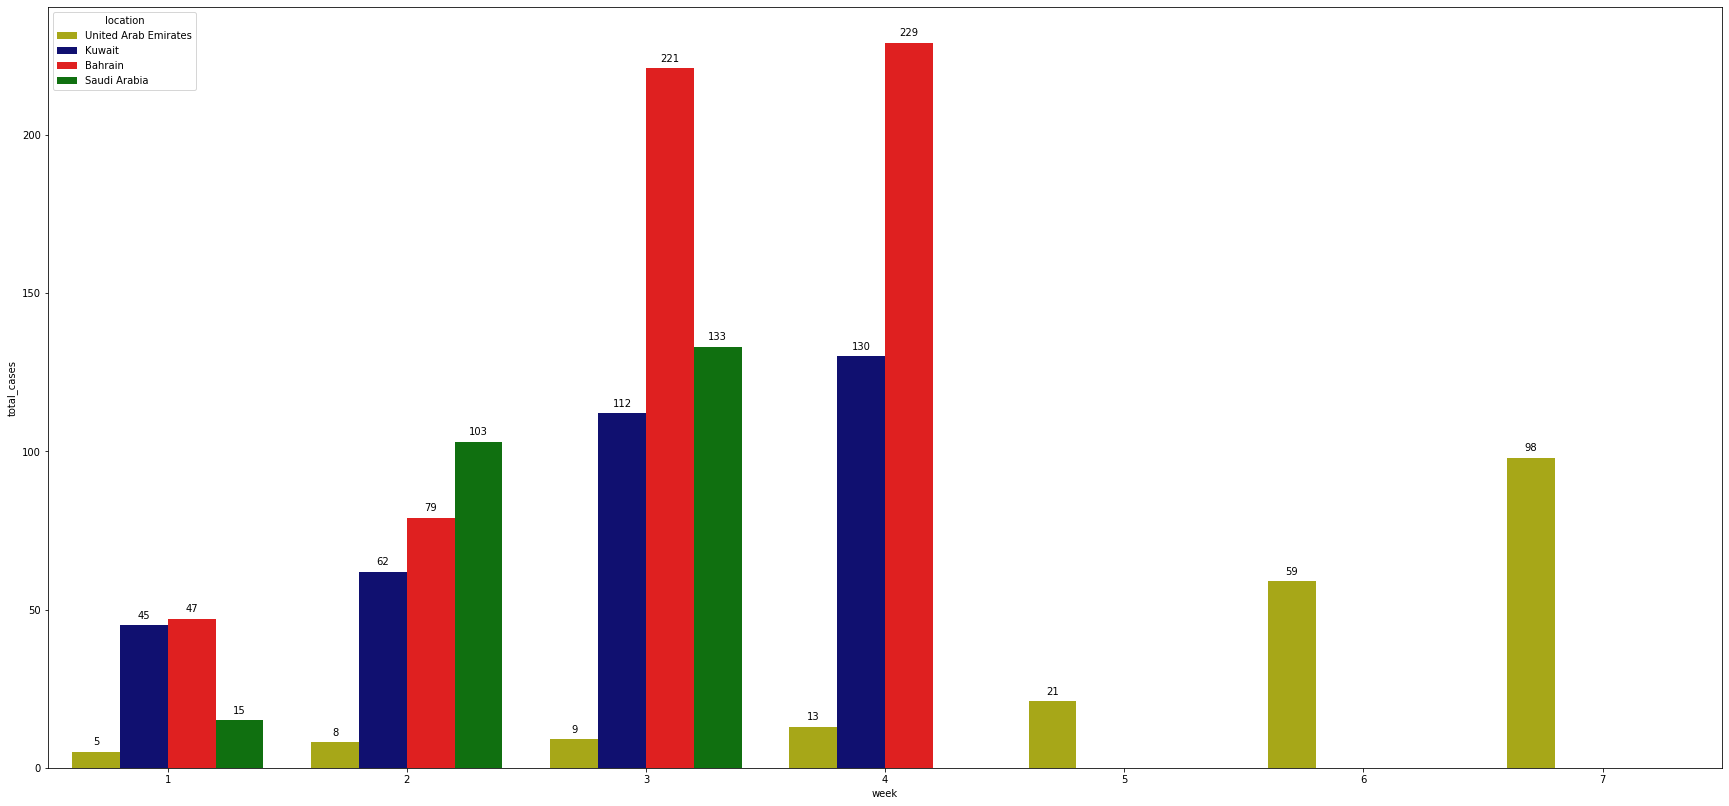

In [857]:
plt.figure(figsize = (30, 14))
palette = {
    'United Arab Emirates': 'y',
    'Kuwait': 'navy',
    'Bahrain': 'r',
    'Saudi Arabia': 'g'
}
ax = sns.barplot(x="week", y="total_cases", hue="location", ci=None,  data=weekly[weekly['week'] < 8], palette=palette)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
# ax.set_ylim([0, 221])
# for line in range(0,siik_highest.shape[0]):
#      ax.text(siik_highest.week[line] , siik_highest.total_cases[line], siik_highest.location[line], horizontalalignment='left', size='20', color='black', weight='bold')

## Increase rate

In [ ]:
no_china_dataset['pct'] = no_china_dataset['total_cases'].pct_change()
no_china_dataset = no_china_dataset.sort_values(['date'])
highest_countries = no_china_dataset.nlargest(5, ['date', 'pct']).reset_index()
highest_countries

In [ ]:
no_china_dataset['pct'] = no_china_dataset['total_cases'] / no_china_dataset['total_cases'].shift(1) - 1
no_china_dataset = no_china_dataset.sort_values(['date'])
highest_countries = no_china_dataset.nlargest(5, ['date', 'pct']).reset_index()
highest_countries

In [ ]:
weekly['pct'] = weekly['total_cases'] / weekly['total_cases'].shift(1) - 1
weekly = weekly.sort_values(['date'])
highest_weekly = weekly.nlargest(5, ['date', 'pct']).reset_index()
highest_weekly

In [ ]:
no_china_dataset[(no_china_dataset['location'] == 'Saudi Arabia') & (no_china_dataset['date'] < '2020-03-18') & (no_china_dataset['date'] > '2020-03-14')]

# Weather Data

In [ ]:
china = pd.read_csv('China.csv')
china.head()

In [ ]:
saudi = pd.read_csv('saudi.csv')
saudi.head()

## New source 
### HUMANITARIAN DATA EXCHANGE 
https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases

In [898]:
time_series_ncov_confirmed = requests.get('https://data.humdata.org/hxlproxy/data/download/time_series-ncov-Confirmed.csv?dest=data_edit&filter01=explode&explode-header-att01=date&explode-value-att01=value&filter02=rename&rename-oldtag02=%23affected%2Bdate&rename-newtag02=%23date&rename-header02=Date&filter03=rename&rename-oldtag03=%23affected%2Bvalue&rename-newtag03=%23affected%2Binfected%2Bvalue%2Bnum&rename-header03=Value&filter04=clean&clean-date-tags04=%23date&filter05=sort&sort-tags05=%23date&sort-reverse05=on&filter06=sort&sort-tags06=%23country%2Bname%2C%23adm1%2Bname&tagger-match-all=on&tagger-default-tag=%23affected%2Blabel&tagger-01-header=province%2Fstate&tagger-01-tag=%23adm1%2Bname&tagger-02-header=country%2Fregion&tagger-02-tag=%23country%2Bname&tagger-03-header=lat&tagger-03-tag=%23geo%2Blat&tagger-04-header=long&tagger-04-tag=%23geo%2Blon&header-row=1&url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_19-covid-Confirmed.csv')

with open('./time_series-ncov-Confirmed.csv', 'wb') as f:
    f.write(time_series_ncov_confirmed.content)

In [902]:
time_series_ncov_deaths = requests.get('https://data.humdata.org/hxlproxy/data/download/time_series-ncov-Deaths.csv?dest=data_edit&filter01=explode&explode-header-att01=date&explode-value-att01=value&filter02=rename&rename-oldtag02=%23affected%2Bdate&rename-newtag02=%23date&rename-header02=Date&filter03=rename&rename-oldtag03=%23affected%2Bvalue&rename-newtag03=%23affected%2Bkilled%2Bvalue%2Bnum&rename-header03=Value&filter04=clean&clean-date-tags04=%23date&filter05=sort&sort-tags05=%23date&sort-reverse05=on&filter06=sort&sort-tags06=%23country%2Bname%2C%23adm1%2Bname&tagger-match-all=on&tagger-default-tag=%23affected%2Blabel&tagger-01-header=province%2Fstate&tagger-01-tag=%23adm1%2Bname&tagger-02-header=country%2Fregion&tagger-02-tag=%23country%2Bname&tagger-03-header=lat&tagger-03-tag=%23geo%2Blat&tagger-04-header=long&tagger-04-tag=%23geo%2Blon&header-row=1&url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_19-covid-Deaths.csv')
with open('./time_series-ncov-Death.csv', 'wb') as f:
    f.write(time_series_ncov_deaths.content)

In [899]:
dataset_w_province = pd.read_csv('time_series-ncov-Confirmed.csv', parse_dates=['Date'], skiprows=[1])
dataset_w_province = dataset_w_province.rename(columns={"Province/State": "province", "Country/Region": "location", "Date": "date", "Value": "total_cases"})
dataset_w_province = dataset_w_province.fillna(0)
dataset_w_province = dataset_w_province.sort_values(['date', 'total_cases'])
dataset_w_province.head()

,province,location,Lat,Long,date,total_cases
58,0,Afghanistan,33.0000,65.0000,2020-01-22,0
117,0,Albania,41.1533,20.1683,2020-01-22,0
176,0,Algeria,28.0339,1.6596,2020-01-22,0
235,0,Andorra,42.5063,1.5218,2020-01-22,0
294,0,Angola,-11.2027,17.8739,2020-01-22,0


In [900]:
dataset_w_province.shape

(28143, 6)

In [905]:
death_dataset = pd.read_csv('time_series-ncov-Death.csv', parse_dates=['Date'], skiprows=[1])
death_dataset = death_dataset.rename(columns={"Province/State": "province", "Country/Region": "location", "Date": "date", "Value": "total_deaths"})
death_dataset = death_dataset.fillna(0)
death_dataset = death_dataset.sort_values(['date', 'total_deaths'])
death_dataset.head()

,province,location,Lat,Long,date,total_deaths
58,0,Afghanistan,33.0000,65.0000,2020-01-22,0
117,0,Albania,41.1533,20.1683,2020-01-22,0
176,0,Algeria,28.0339,1.6596,2020-01-22,0
235,0,Andorra,42.5063,1.5218,2020-01-22,0
294,0,Angola,-11.2027,17.8739,2020-01-22,0


In [909]:
death_dataset[death_dataset.location == 'US']

,province,location,Lat,Long,date,total_deaths
13333,"Adams, IN",US,39.8522,-77.2865,2020-01-22,0
13392,Alabama,US,32.3182,-86.9023,2020-01-22,0
13451,"Alachua, FL",US,29.7938,-82.4944,2020-01-22,0
13510,"Alameda County, CA",US,37.6017,-121.7195,2020-01-22,0
13569,Alaska,US,61.3707,-152.4044,2020-01-22,0
...,...,...,...,...,...,...
17287,Georgia,US,33.0406,-83.6431,2020-03-20,13
20119,Louisiana,US,31.1695,-91.8678,2020-03-20,14
14514,California,US,36.1162,-119.6816,2020-03-20,23
22125,New York,US,42.1657,-74.9481,2020-03-20,42


In [864]:
dataset_w_province[dataset_w_province.total_cases == dataset_w_province.total_cases.max()]

,province,location,Lat,Long,date,total_cases
3539,Hubei,China,30.9756,112.2707,2020-03-18,67800
3538,Hubei,China,30.9756,112.2707,2020-03-19,67800


In [865]:
china_cities = dataset_w_province[dataset_w_province['location'] == 'China']
china_cities = china_cities[china_cities['province'] != 'Hubei']
china_cities_highest = china_cities.nlargest(4, ['date', 'total_cases']).reset_index()

## Cases of Corona virus excluding China

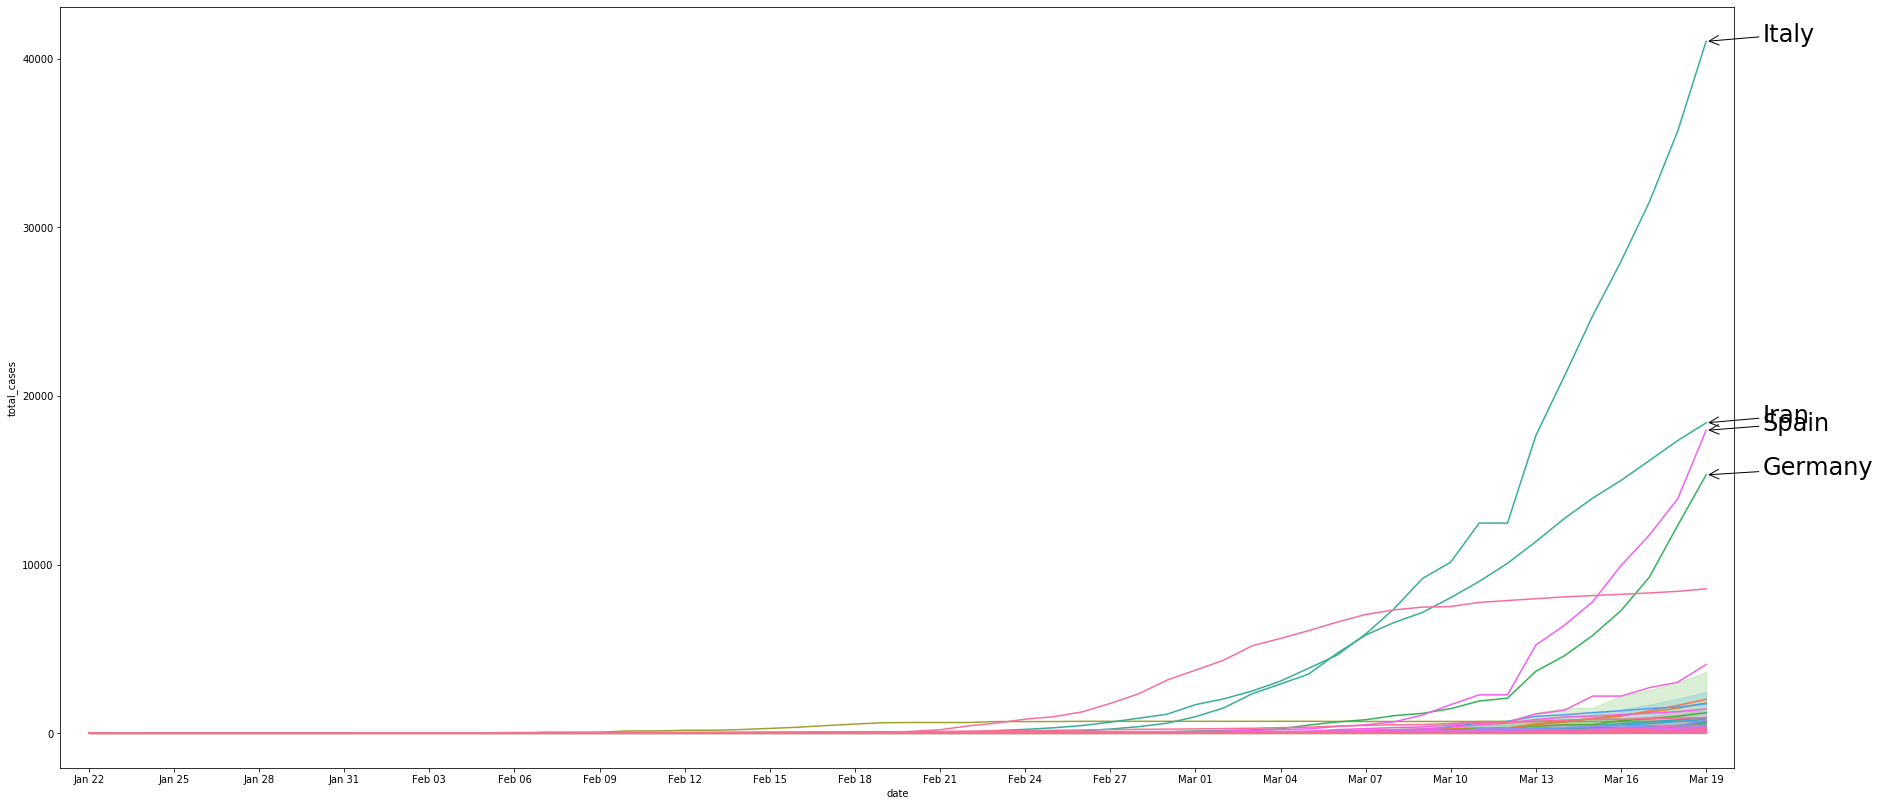

In [875]:
no_china_dataset = dataset_w_province[dataset_w_province['location'] != 'China']
highest_countries = no_china_dataset.nlargest(4, ['date', 'total_cases']).reset_index()

plt.figure(figsize = (30, 14))

ax = sns.lineplot(x="date", y="total_cases", hue="location", legend=False,  data=no_china_dataset)

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

ax.set_xlim([no_china_dataset.date.min() - datetime.timedelta(days=1), no_china_dataset.date.max() + datetime.timedelta(days=1)])

for i in range(4):
    ax.annotate(highest_countries.iloc[i].location, 
                xy=(no_china_dataset.date.max(), highest_countries.iloc[i].total_cases), fontsize=24,
                xytext=(no_china_dataset.date.max() + datetime.timedelta(days=2),
                        highest_countries.iloc[i].total_cases), 
                arrowprops=dict(facecolor='black', arrowstyle="->"));




## Chinese Cities Corona Virus Spread

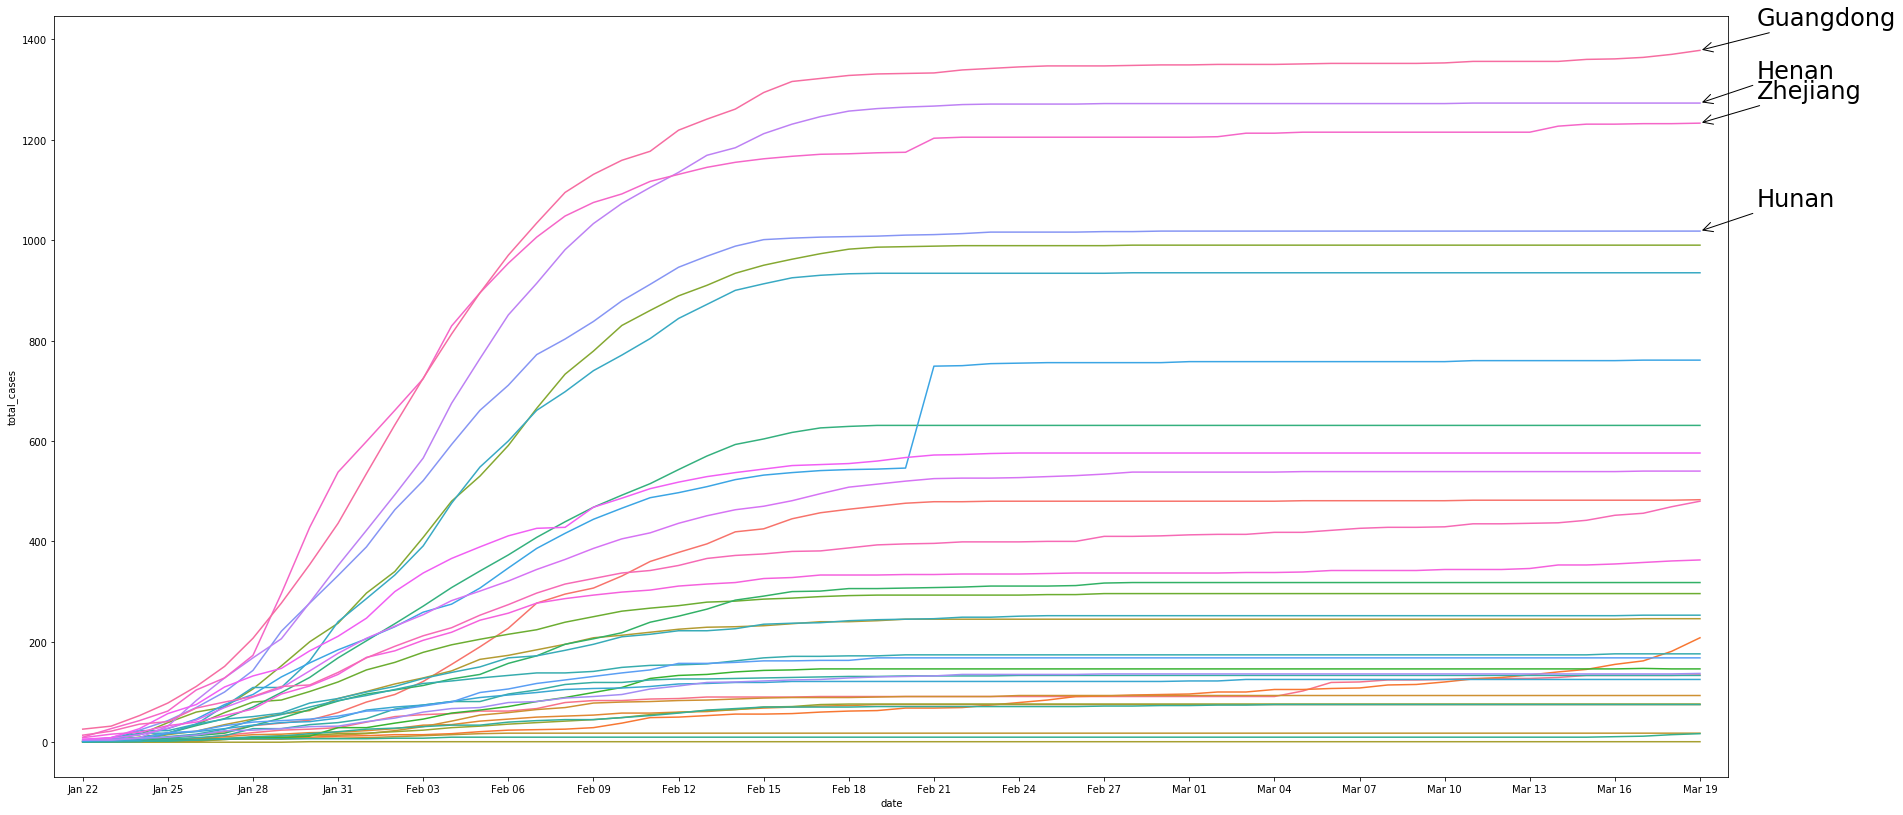

In [829]:
plt.figure(figsize = (30, 14))

ax = sns.lineplot(x="date", y="total_cases", hue="province", legend=False,  data=china_cities)

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

ax.set_xlim([china_cities.date.min() - datetime.timedelta(days=1), china_cities.date.max() + datetime.timedelta(days=1)])

for i in range(4):
    ax.annotate(china_cities_highest.iloc[i].province, 
                xy=(china_cities.date.max(), china_cities_highest.iloc[i].total_cases), fontsize=24,
                xytext=(china_cities.date.max() + datetime.timedelta(days=2),
                        china_cities_highest.iloc[i].total_cases + 50), 
                arrowprops=dict(facecolor='black', arrowstyle="->"));

## Italy, Iran, Spain, Germany V.S China Cities ( exluding Hubei )

In [830]:
world_vs_china = dataset_w_province[dataset_w_province['location'].isin(['Italy', 'Iran', 'Spain', 'Germany', 'China'])]
world_vs_china.location[world_vs_china['location'] == 'China'] = world_vs_china.province[world_vs_china['location'] == 'China']
world_vs_china = world_vs_china[world_vs_china.location != 'Hubei']
world_highest = world_vs_china.nlargest(4, ['date', 'total_cases']).reset_index()

/Users/mohammedalawami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


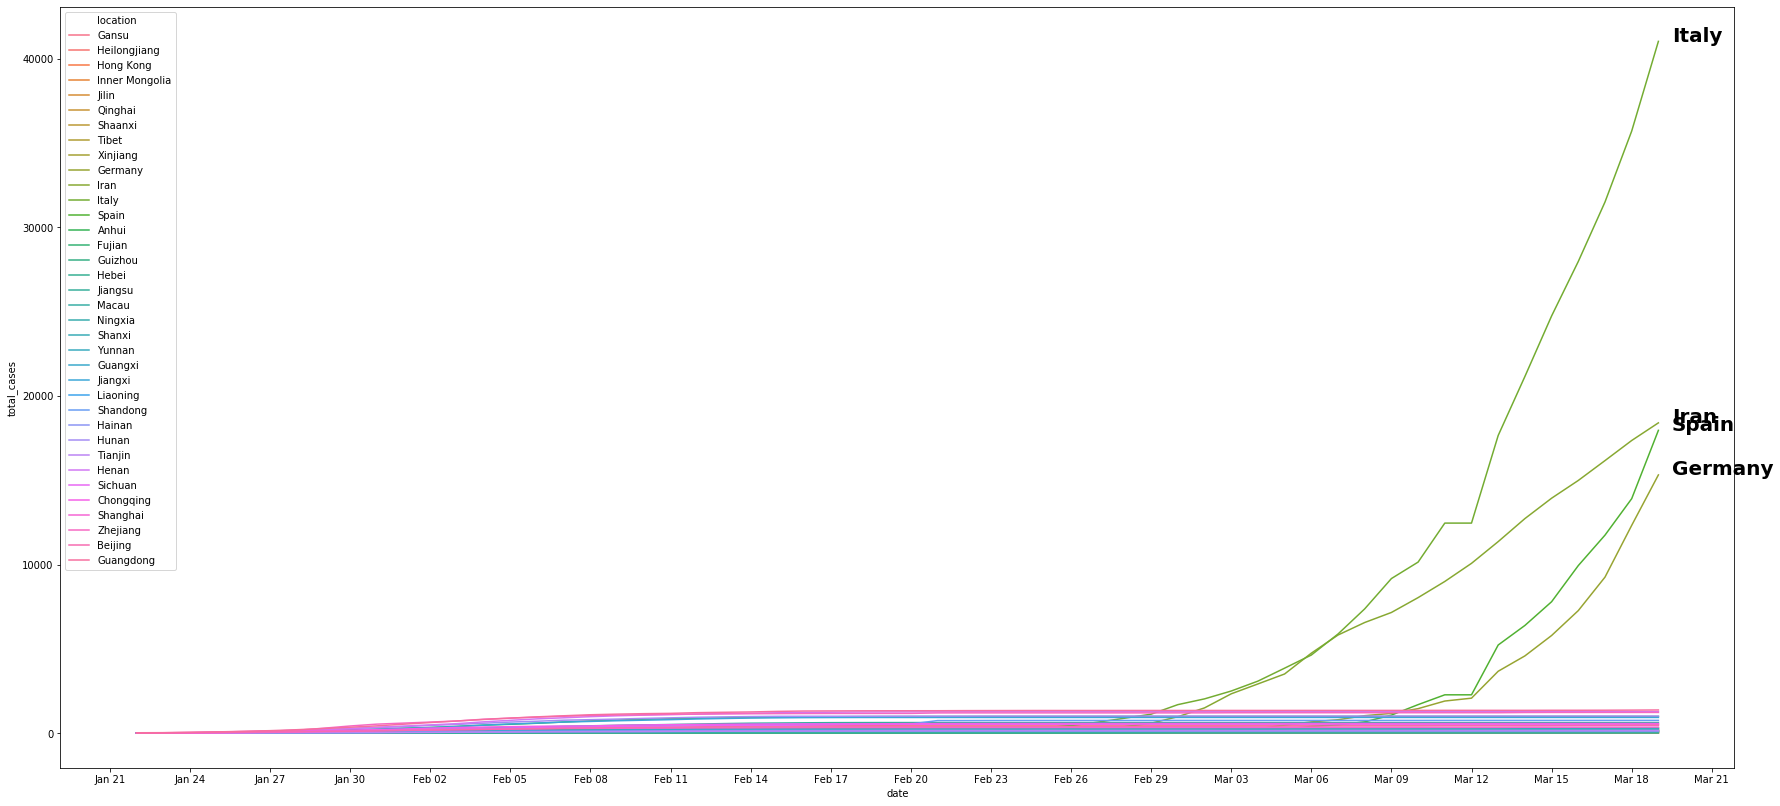

In [831]:
plt.figure(figsize = (30, 14))

ax = sns.lineplot(x="date", y="total_cases", hue="location",   data=world_vs_china)

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

# ax.set_xlim([world_vs_china.date.min() - datetime.timedelta(days=1), world_vs_china.date.max() + datetime.timedelta(days=1)]);

    
# for i in range(4):
#     ax.annotate(world_highest.iloc[i].location, 
#                 xy=(world_vs_china.date.max(), world_highest.iloc[i].total_cases), fontsize=24,
#                 xytext=(world_vs_china.date.max() + datetime.timedelta(days=2),
#                         world_highest.iloc[i].total_cases + 50), 
#                 arrowprops=dict(facecolor='black', arrowstyle="->"));

for line in range(0,world_highest.shape[0]):
     ax.text(world_highest.date[line] + datetime.timedelta(days=0.5), world_highest.total_cases[line], world_highest.location[line], horizontalalignment='left', size='20', color='black', weight='bold')


## Excluding outliers, (Italy, Iran, Sk, Spain)

In [876]:
no_outliers = no_china_dataset[~ no_china_dataset.location.isin(highest_countries.location)]
highest_no_outliers = no_outliers.nlargest(10, ['date', 'total_cases']).reset_index()
highest_no_outliers

,index,province,location,Lat,Long,date,total_cases
0,6090,France,France,46.2276,2.2137,2020-03-19,10871
1,8062,0,"Korea, South",36.0000,128.0000,2020-03-19,8565
2,21286,New York,US,42.1657,-74.9481,2020-03-19,5365
3,11600,0,Switzerland,46.8182,8.2275,2020-03-19,4075
4,12470,United Kingdom,United Kingdom,55.3781,-3.4360,2020-03-19,2689
5,9570,Netherlands,Netherlands,52.1326,5.2913,2020-03-19,2460
6,928,0,Austria,47.5162,14.5501,2020-03-19,2013
7,1334,0,Belgium,50.8333,4.0000,2020-03-19,1795
8,9860,0,Norway,60.4720,8.4689,2020-03-19,1746
9,11542,0,Sweden,63.0000,16.0000,2020-03-19,1439


In [881]:
no_outliers.sort_values(['date', 'total_cases']).tail(10)

,province,location,Lat,Long,date,total_cases
11542,0,Sweden,63.0000,16.0000,2020-03-19,1439
9860,0,Norway,60.4720,8.4689,2020-03-19,1746
1334,0,Belgium,50.8333,4.0000,2020-03-19,1795
928,0,Austria,47.5162,14.5501,2020-03-19,2013
9570,Netherlands,Netherlands,52.1326,5.2913,2020-03-19,2460
12470,United Kingdom,United Kingdom,55.3781,-3.4360,2020-03-19,2689
11600,0,Switzerland,46.8182,8.2275,2020-03-19,4075
21286,New York,US,42.1657,-74.9481,2020-03-19,5365
8062,0,"Korea, South",36.0000,128.0000,2020-03-19,8565
6090,France,France,46.2276,2.2137,2020-03-19,10871


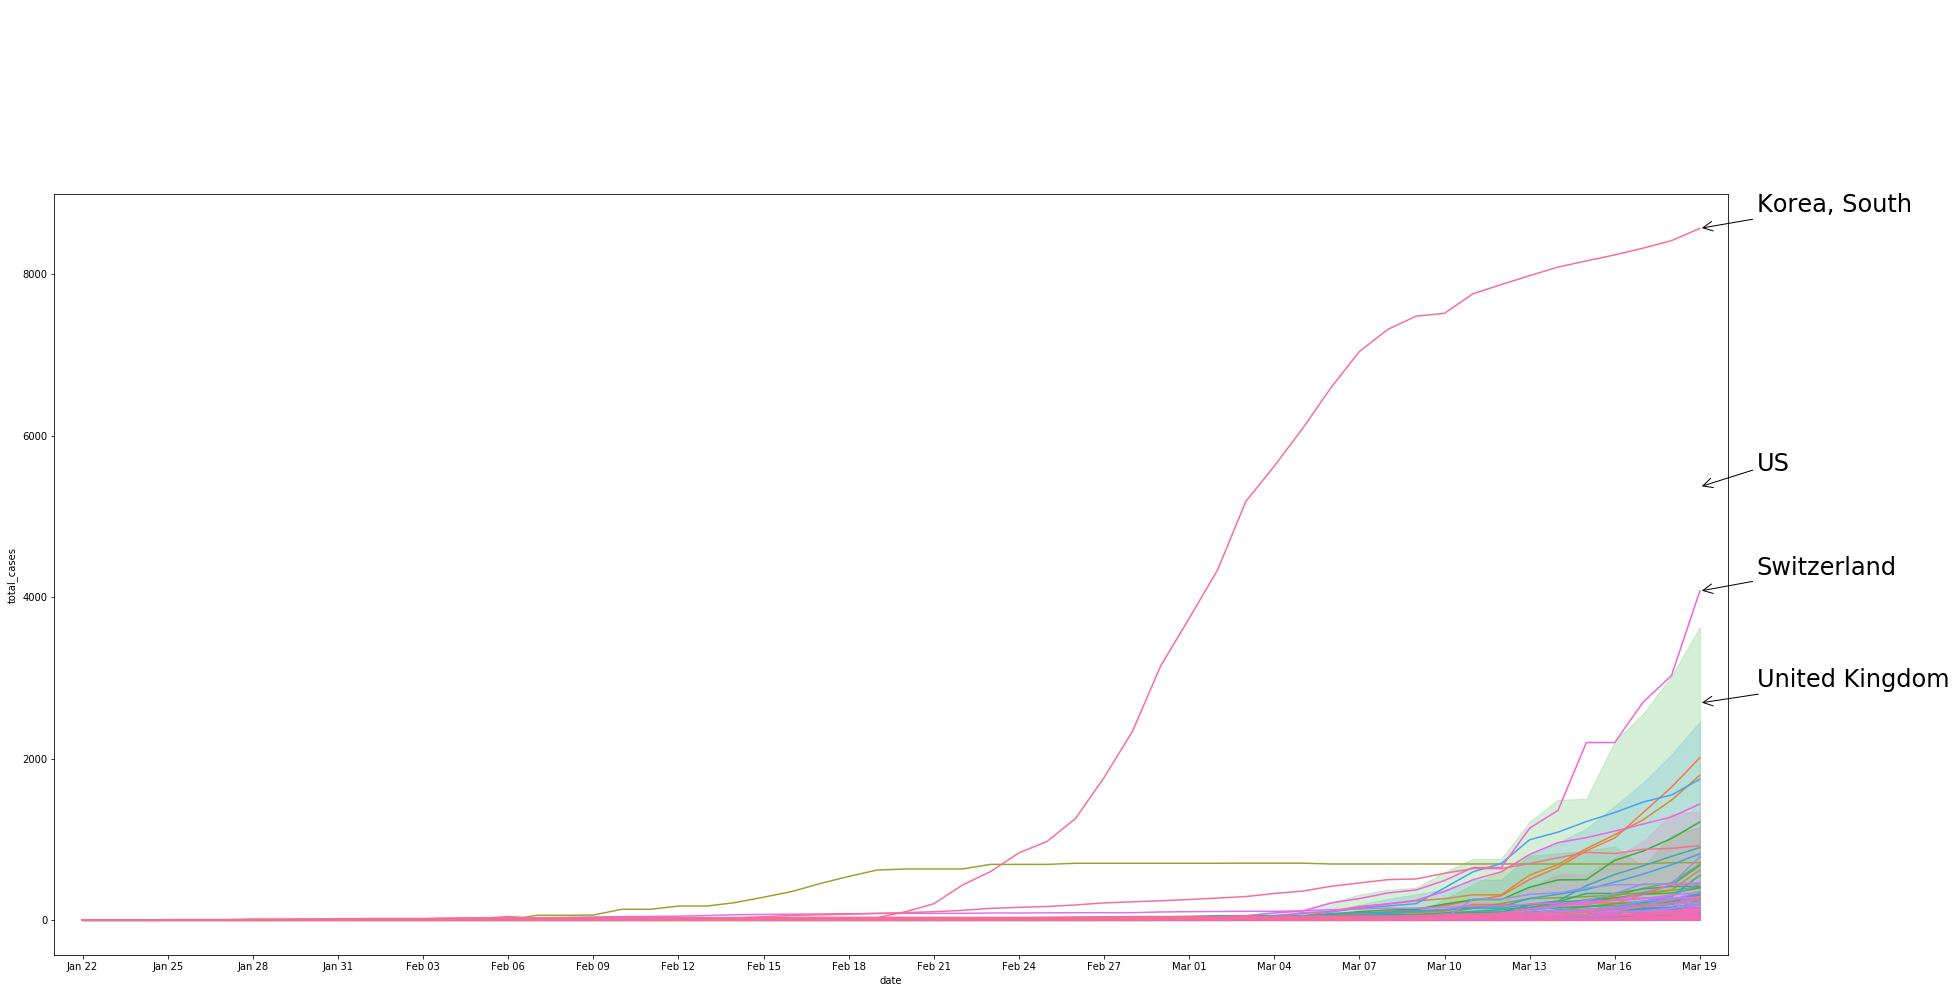

In [886]:
plt.figure(figsize = (30, 14))

ax = sns.lineplot(x="date", y="total_cases", hue="location", legend=False,  data=no_outliers)

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

ax.set_xlim([no_outliers.date.min() - datetime.timedelta(days=1), no_outliers.date.max() + datetime.timedelta(days=1)])

for i in range(5):
    ax.annotate(highest_no_outliers.iloc[i].location, 
                xy=(no_outliers.date.max(), highest_no_outliers.iloc[i].total_cases), fontsize=24,
                xytext=(no_outliers.date.max() + datetime.timedelta(days=2),
                        highest_no_outliers.iloc[i].total_cases + 200), 
                arrowprops=dict(facecolor='black', arrowstyle="->"));


In [832]:
gulf_countries = dataset_w_province[dataset_w_province.location.isin(['Saudi Arabia', 'Kuwait', 'Bahrain', 'United Arab Emirates'])]
gulf_highest = gulf_countries.nlargest(4, ['date', 'total_cases']).reset_index()
gulf_highest

,index,province,location,Lat,Long,date,total_cases
0,1102,0,Bahrain,26.0275,50.55,2020-03-19,278
1,10788,0,Saudi Arabia,24.0000,45.00,2020-03-19,274
2,8178,0,Kuwait,29.5000,47.75,2020-03-19,148
3,12122,0,United Arab Emirates,24.0000,54.00,2020-03-19,140


In [895]:
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]
total = {
    'location': 'US',
    'province': 'US',
    'date': '2020-03-19',
    'total_cases': sum(no_outliers.total_cases[(no_outliers.location == 'US') & (no_outliers.date == '2020-03-19')])
}
total

{'location': 'US',
 'province': 'US',
 'date': '2020-03-19',
 'total_cases': 13677}

In [894]:
no_outliers[no_outliers.province == 'France']

,province,location,Lat,Long,date,total_cases
6147,France,France,46.2276,2.2137,2020-01-22,0
6146,France,France,46.2276,2.2137,2020-01-23,0
6145,France,France,46.2276,2.2137,2020-01-24,2
6144,France,France,46.2276,2.2137,2020-01-25,3
6143,France,France,46.2276,2.2137,2020-01-26,3
6142,France,France,46.2276,2.2137,2020-01-27,3
6141,France,France,46.2276,2.2137,2020-01-28,4
6140,France,France,46.2276,2.2137,2020-01-29,5
6139,France,France,46.2276,2.2137,2020-01-30,5
6138,France,France,46.2276,2.2137,2020-01-31,5


## new source

In [817]:
covid_data = requests.get('https://datacommunitysa.us19.list-manage.com/track/click?u=09b1831b880db155c1219e9a5&id=a02ec1b484&e=b9af93564e')

In [778]:
with open('./covid_data.csv', 'wb') as f:
    f.write(covid_data.content)

In [930]:
covid_data = pd.read_csv('covid_data.csv')
covid_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,59,70,75,82,114,147,177,212,272,322
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,639,639,701,773,839,825,878,889,924,963
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,178,178,200,212,226,243,266,313,345,385
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,149,149,197,238,428,566,673,790,900,1030


In [931]:
covid_data = covid_data.melt(id_vars=['Country/Region', 'Province/State', 'Lat', 'Long'], var_name='date', value_name="total_cases")
covid_data = covid_data.rename(columns={"Province/State": "province", "Country/Region": "location"})
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data.head()

,location,province,Lat,Long,date,total_cases
0,Thailand,NaN,15.0000,101.0000,2020-01-22,2
1,Japan,NaN,36.0000,138.0000,2020-01-22,2
2,Singapore,NaN,1.2833,103.8333,2020-01-22,0
3,Nepal,NaN,28.1667,84.2500,2020-01-22,0
4,Malaysia,NaN,2.5000,112.5000,2020-01-22,0


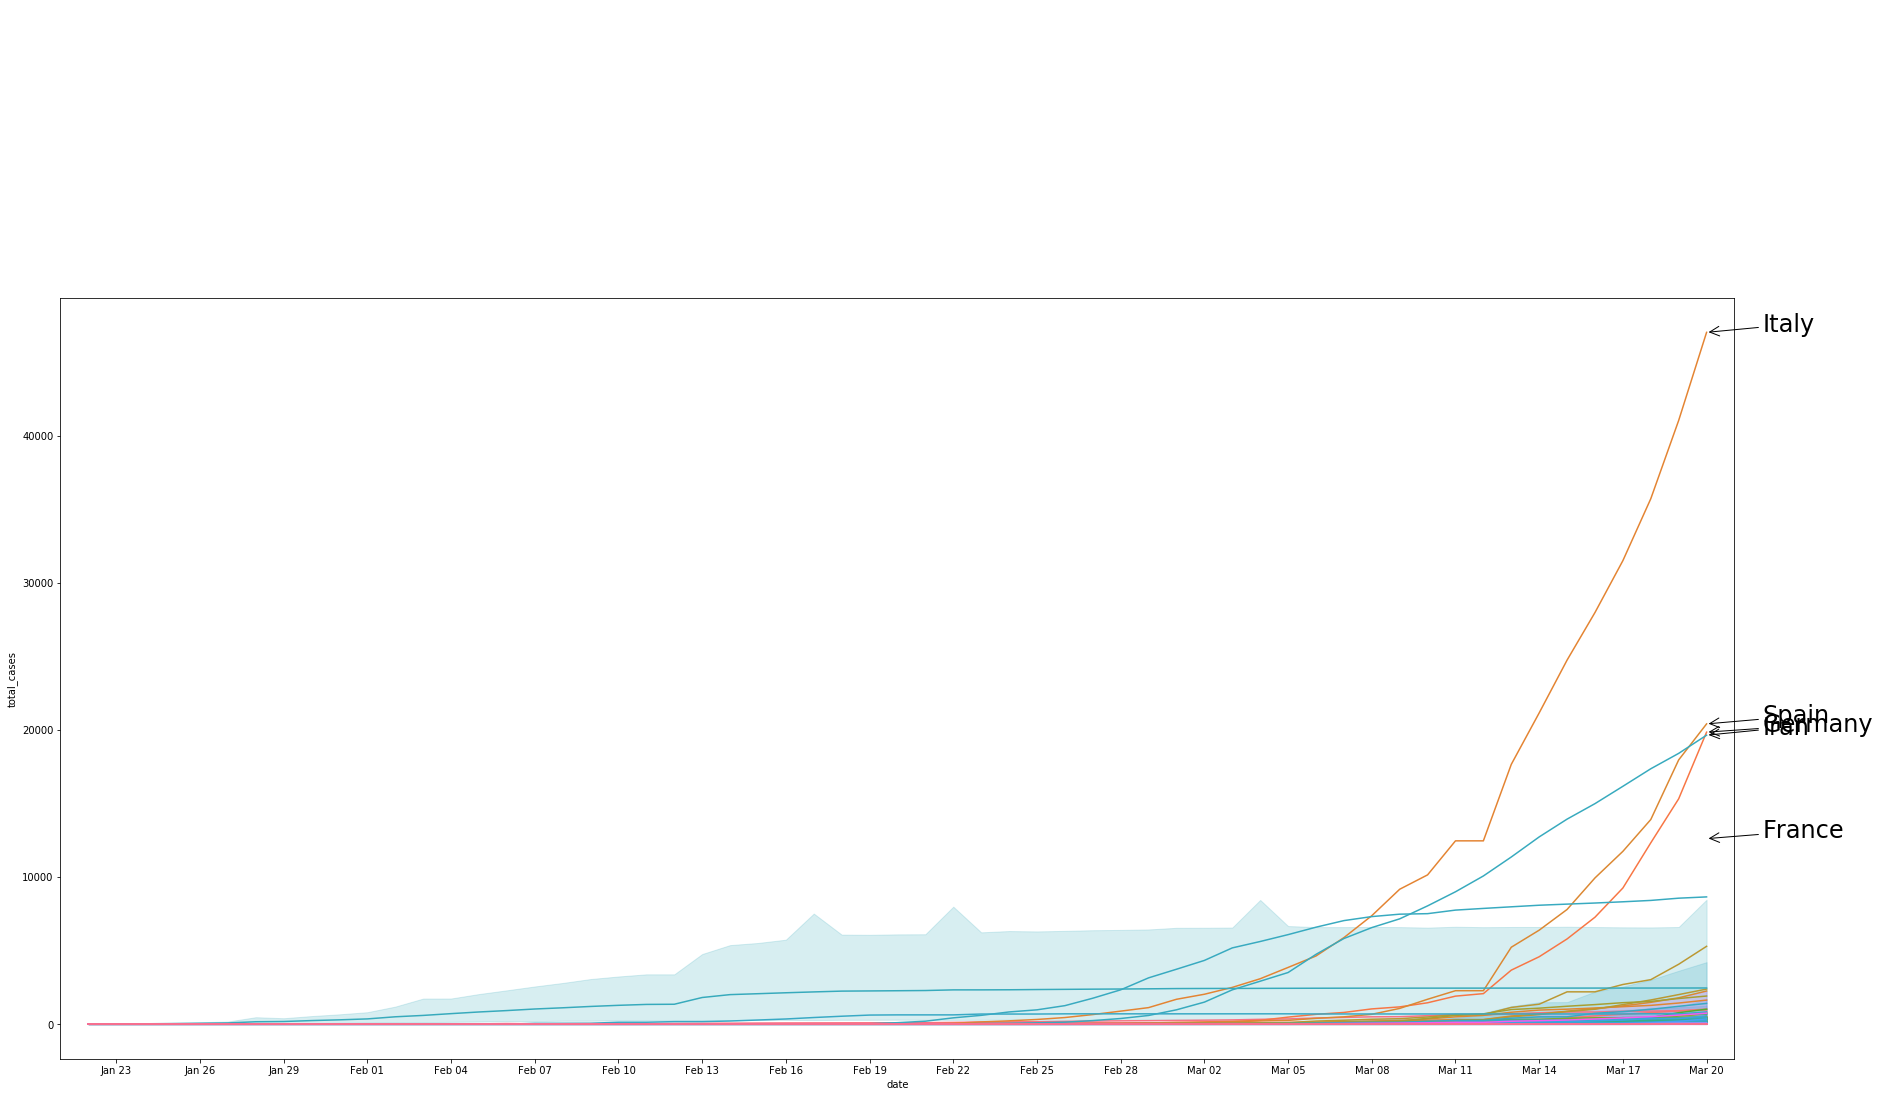

In [932]:
highest = covid_data.nlargest(6, ['date', 'total_cases']).reset_index()


plt.figure(figsize = (30, 14))

ax = sns.lineplot(x="date", y="total_cases", hue="location", legend=False,  data=covid_data)

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

ax.set_xlim([covid_data.date.min() - datetime.timedelta(days=1), covid_data.date.max() + datetime.timedelta(days=1)])

for i in range(6):
    ax.annotate(highest.iloc[i].location, 
                xy=(covid_data.date.max(), highest.iloc[i].total_cases), fontsize=24,
                xytext=(covid_data.date.max() + datetime.timedelta(days=2),
                        highest.iloc[i].total_cases + 50), 
                arrowprops=dict(facecolor='black', arrowstyle="->"));

In [815]:
gulf_countries = covid_data[covid_data.location.isin(['Saudi Arabia', 'Kuwait', 'Bahrain', 'United Arab Emirates'])]
gulf_highest = gulf_countries.nlargest(4, ['date', 'total_cases']).reset_index()
gulf_highest

,index,location,province,Lat,Long,date,total_cases
0,25899,Bahrain,NaN,26.0275,50.55,2020-03-18,256
1,25936,Saudi Arabia,NaN,24.0000,45.00,2020-03-18,171
2,25900,Kuwait,NaN,29.5000,47.75,2020-03-18,142
3,25885,United Arab Emirates,NaN,24.0000,54.00,2020-03-18,113


In [938]:
covid_data[(covid_data.location == 'US') & (covid_data.date == '2020-03-20')][:60]

,location,province,Lat,Long,date,total_cases
27764,US,Washington,47.4009,-121.4905,2020-03-20,1524
27765,US,New York,42.1657,-74.9481,2020-03-20,8310
27766,US,California,36.1162,-119.6816,2020-03-20,1177
27767,US,Massachusetts,42.2302,-71.5301,2020-03-20,413
27768,US,Diamond Princess,35.4437,139.6380,2020-03-20,49
27769,US,Grand Princess,37.6489,-122.6655,2020-03-20,23
27770,US,Georgia,33.0406,-83.6431,2020-03-20,420
27771,US,Colorado,39.0598,-105.3111,2020-03-20,363
27772,US,Florida,27.7663,-81.6868,2020-03-20,563
27773,US,New Jersey,40.2989,-74.5210,2020-03-20,890
